In [54]:
import pandas as pd
import numpy as np
import wordcloud
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r'c:\users\pabhati\desktop\NYC_Airbnb\AB_NYC_2019.csv')

In [9]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df.shape

(48895, 16)

In [11]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## mean price by room types in different neighbourhood groups

In [13]:
pd.pivot_table(df, values='price', columns=['room_type'], index=['neighbourhood_group'], aggfunc={'price':np.mean})

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [14]:
df['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [15]:
import re
def preprocessor(text):
    text = re.sub('[\W\d]+', ' ', str(text).lower())
    return text

In [16]:
preprocessor("Clean & quiet apt home by / , @@the \park 23rd!! 30.0  j's")

'clean quiet apt home by the park rd j s'

In [17]:
words = df['name']

In [18]:
type(words)

pandas.core.series.Series

In [23]:
filtered_words = words.apply(preprocessor)

In [30]:
filtered_words

0                         clean quiet apt home by the park
1                                    skylit midtown castle
2                          the village of harlem new york 
3                          cozy entire floor of brownstone
4          entire apt spacious studio loft by central park
                               ...                        
48890        charming one bedroom newly renovated rowhouse
48891        affordable room in bushwick east williamsburg
48892              sunny studio at historical neighborhood
48893                    rd st time square cozy single bed
48894    trendy duplex in the very heart of hell s kitchen
Name: name, Length: 48895, dtype: object

In [20]:
df.name.isna().count()

48895

In [29]:
from nltk import FreqDist
def tokenizer(text):
    return text.split()

In [31]:
word_list = filtered_words.apply(tokenizer)

In [33]:
word_count = word_list.apply(FreqDist).sum()
common_word = pd.DataFrame(word_count.most_common(20), columns=['words', 'frequency'])
print(common_word)

        words  frequency
0          in      16797
1        room      10297
2     bedroom       8308
3     private       7411
4   apartment       6761
5        cozy       5100
6         apt       4747
7    brooklyn       4176
8      studio       4108
9          br       4064
10        the       3921
11         to       3837
12   spacious       3796
13  manhattan       3597
14       park       3162
15       with       3111
16       east       3108
17         of       3009
18      sunny       2945
19        and       2872


In [39]:
text = common_word.iloc[:,0]

In [51]:
" ".join(text)

'in room bedroom private apartment cozy apt brooklyn studio br the to spacious manhattan park with east of sunny and'

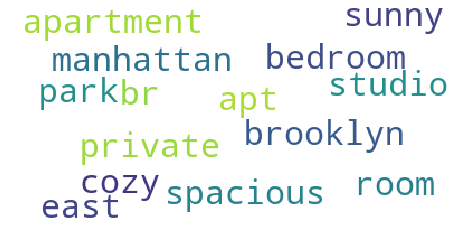

In [58]:
cloud = wordcloud.WordCloud(max_font_size=30, background_color='white').generate(" ".join(text))
fig = plt.figure(1, figsize=(8,6))
plt.imshow(cloud)
plt.axis('off')
plt.show()